## Model prediction boston houses kaggle

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Import data

In [3]:
data = pd.read_csv("./boston/Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Exploratory data analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

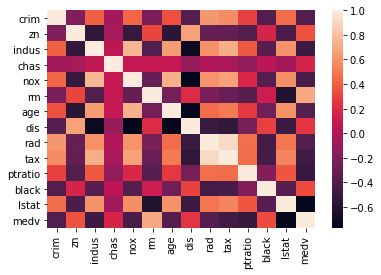

In [6]:
sns.heatmap(data.corr())

In [7]:
data.shape

(506, 14)

In [8]:
colnames = data.columns.values.tolist()

In [9]:
predictors = colnames[0:13]
target = colnames[13]

In [10]:
predictors

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

In [11]:
target

'medv'

In [12]:
X = data[predictors]
Y = data[target]

In [13]:
X.columns.values.tolist()

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

In [14]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

# Linear regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
x_train.shape,x_test.shape

((404, 13), (102, 13))

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(X)

In [21]:
data["predict medv"] = y_pred

In [22]:
data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,predict medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.588436
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.334068
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.338403
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,28.204330
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,27.385086
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,25.345149
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,23.374327
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,19.712903
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,11.517804
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,19.149689


In [23]:
lr.score(x_test,y_test)

0.7421578376059903

In [24]:
r2_score(Y,lr.predict(X))

0.7377629354591202

In [25]:
def plotting(actual_values,predicted_values,title ):
    plt.figure(figsize=(16,9))
    sns.distplot(Y, hist=False, color="r", label="Actual")
    sns.distplot(predicted_values, hist=False, color="b", label="Predicted")
    plt.title(title)
    plt.legend()
    plt.show()

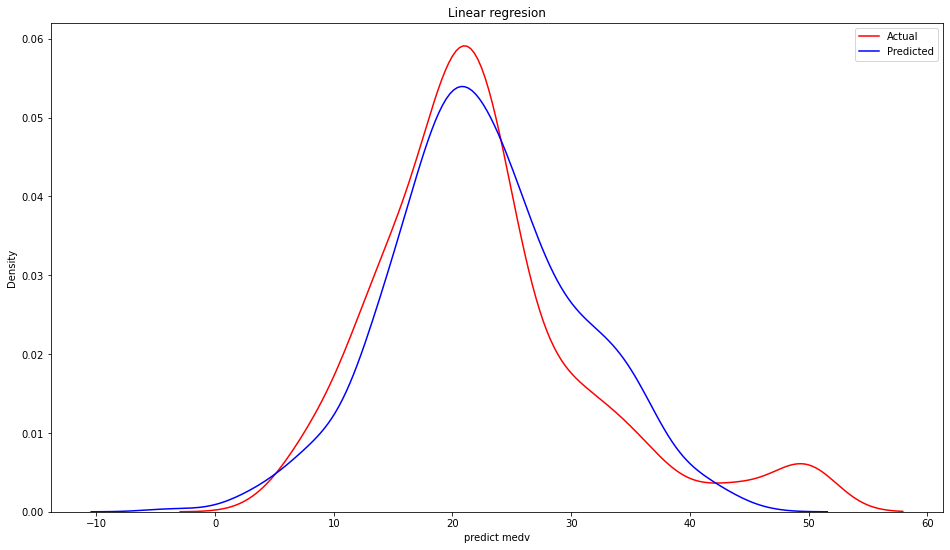

In [26]:
plotting(Y,data["predict medv"],"Linear regresion")

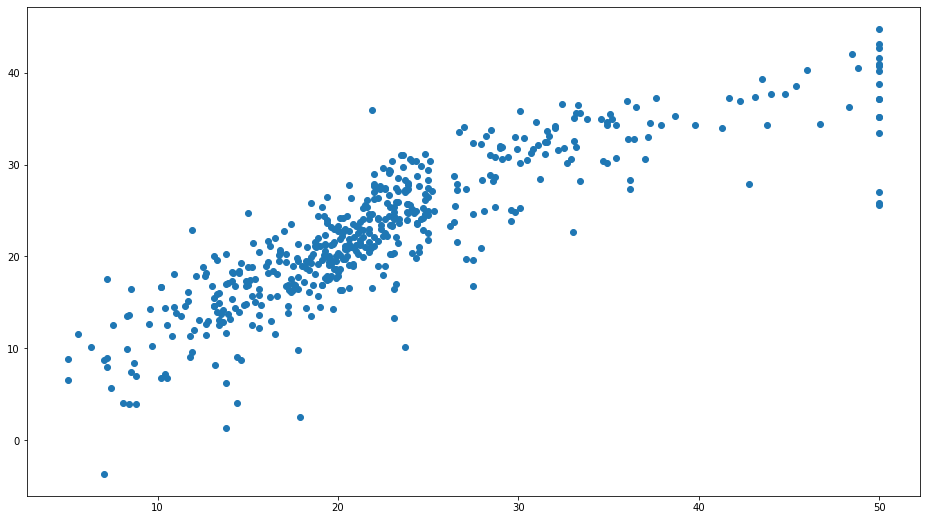

In [27]:
plt.figure(figsize=(16,9))
plt.scatter(Y,data["predict medv"])

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
# from sklearn.model_selection import KFold
# cv1 = KFold(n_splits=10)

In [30]:
# cv = cross_val_score(lr,X,Y, cv = cv1)

In [31]:
# cv

In [32]:
from sklearn.model_selection import KFold
cv2 = KFold(n_splits=10, shuffle=True) ## shuffle = True para evitar que se seleccionen los mismos
#datos y pueda darme lugar a r^2 negativos

In [33]:
cv_linear = cross_val_score(lr,X,Y, cv = cv2)
cv_linear,cv_linear.mean()

(array([0.58240413, 0.78427928, 0.81019453, 0.80061818, 0.70497677,
        0.78136018, 0.62968942, 0.69082771, 0.55031898, 0.72522592]),
 0.7059895102447211)

### Mean squared error linear regression

In [34]:
mean_squared_linear = mean_squared_error(y_test,lr.predict(x_test))
mean_squared_linear

16.492018161105737

## Recursive feature elimination

In [35]:
from sklearn.feature_selection import RFE

In [36]:
rfe = RFE(estimator=lr, n_features_to_select=7, step=1)

In [37]:
rfe.fit(X,Y)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [38]:
rfe.ranking_

array([2, 4, 3, 1, 1, 1, 7, 1, 1, 5, 1, 6, 1])

In [39]:
z=list(zip(predictors,rfe.support_, rfe.ranking_))

In [40]:
z

[('crim', False, 2),
 ('zn', False, 4),
 ('indus', False, 3),
 ('chas', True, 1),
 ('nox', True, 1),
 ('rm', True, 1),
 ('age', False, 7),
 ('dis', True, 1),
 ('rad', True, 1),
 ('tax', False, 5),
 ('ptratio', True, 1),
 ('black', False, 6),
 ('lstat', True, 1)]

In [41]:
lr2 = LinearRegression()

In [42]:
x_rfe = data[["chas","nox","rm","dis","rad","ptratio","lstat"]] # features using RFE

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_rfe, Y, test_size=0.2)

In [44]:
lr2.fit(x_train,y_train)

LinearRegression()

In [45]:
cv = cross_val_score(lr2,x_rfe,Y,cv=cv2)
cv,cv.mean()

(array([0.79009743, 0.54110445, 0.76352714, 0.59027826, 0.7273366 ,
        0.71596688, 0.61039432, 0.78159047, 0.75744388, 0.59895356]),
 0.6876692995983966)

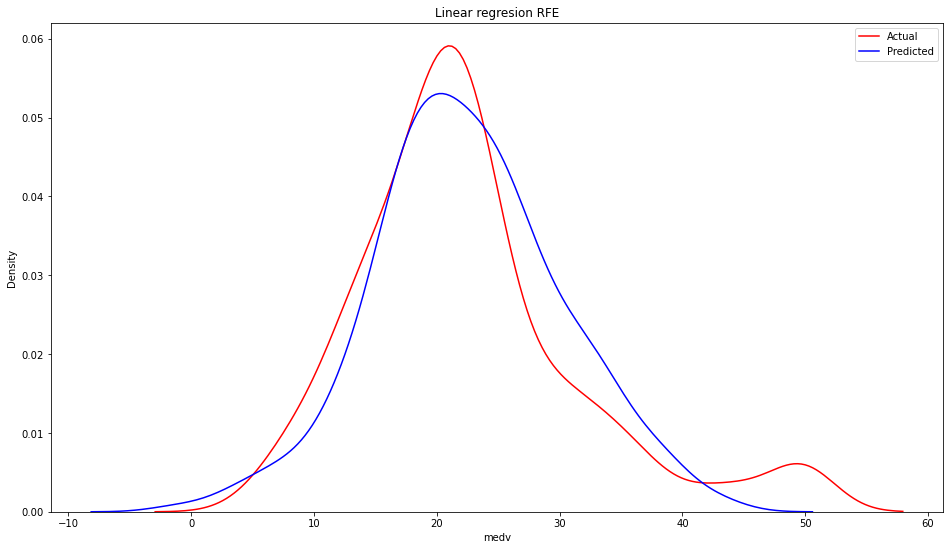

In [46]:
plotting(Y,lr2.predict(x_rfe),"Linear regresion RFE")

In [47]:
mean_squared_RFE = mean_squared_error(Y,lr2.predict(x_rfe))
mean_squared_RFE

23.95718628982356

# Polynomial regression


In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(X)
x_poly_train = poly_reg.fit_transform(x_train)
x_poly_test = poly_reg.fit_transform(x_test)

In [50]:
poly = LinearRegression()


### Polynomial regression errors

In [51]:
cv_poly = cross_val_score(poly,x_poly,Y, cv = cv2)
cv_poly,cv_poly.mean()

(array([0.87902366, 0.73676788, 0.58618449, 0.84821999, 0.83462223,
        0.86576815, 0.71476691, 0.87360127, 0.51341498, 0.75446491]),
 0.7606834474450275)

In [52]:
poly.fit(x_poly_train,y_train)

LinearRegression()

In [53]:
poly.score(x_poly_test,y_test)

0.794178192726616

In [54]:
data["poly_reg"] = poly.predict(x_poly)

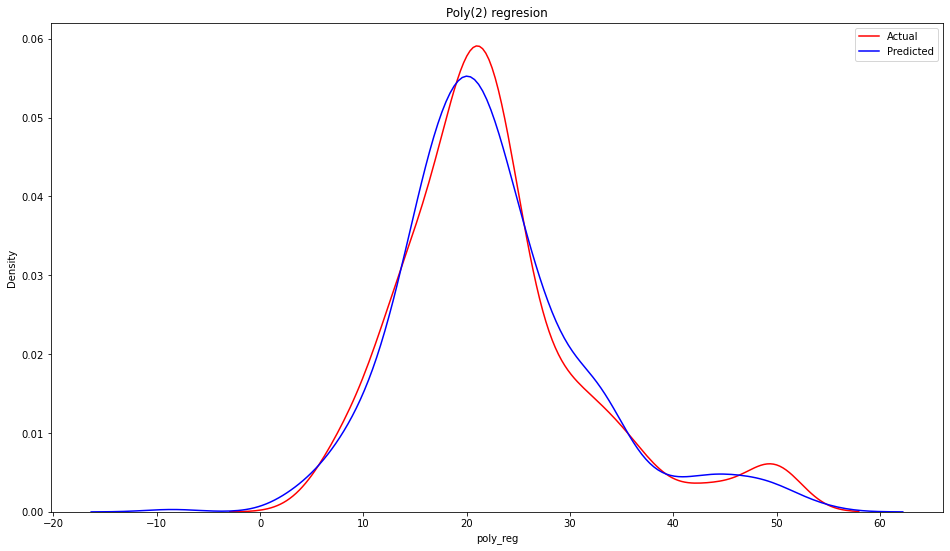

In [55]:
plotting(Y,data["poly_reg"],"Poly(2) regresion")

In [56]:
poly_mean_squared_error = mean_squared_error(Y,data["poly_reg"])
poly_mean_squared_error

8.164893582630615

In [57]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,predict medv,poly_reg
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.588436,24.013315
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.334068,23.322219
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.338403,32.347244
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,28.204330,32.272590
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,27.385086,31.693884


## Support vector machine

In [58]:
from sklearn.svm import SVR
svr_linear = SVR(kernel="linear")
svr_rbf = SVR(kernel="rbf")

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
svr_linear.fit(x_train,y_train)
svr_rbf.fit(x_train,y_train)

SVR()

### Support vector machine error

In [60]:
cv_svr_linear = cross_val_score(svr_linear,X,Y, cv = cv2)
cv_svr_linear,cv_svr_linear.mean()

(array([0.72181462, 0.75663186, 0.54483021, 0.78027073, 0.74984508,
        0.83091212, 0.83375778, 0.77449176, 0.40560094, 0.4517956 ]),
 0.684995069587514)

In [61]:
cv_svr_rbf = cross_val_score(svr_rbf,X,Y, cv = cv2)
cv_svr_rbf,cv_svr_rbf.mean()

(array([0.08858611, 0.1839306 , 0.38662793, 0.10486867, 0.21992191,
        0.46066834, 0.21020158, 0.15213994, 0.2501561 , 0.09180634]),
 0.21489075080067063)

In [62]:
svr_linear.score(x_test,y_test)

0.7291614429572126

In [63]:
svr_rbf.score(x_test,y_test)

0.41146162509348183

### SVR predictions

In [64]:
data["svr_linear"] = svr_linear.predict(X)

In [65]:
data["svr_rbf"] = svr_rbf.predict(X)

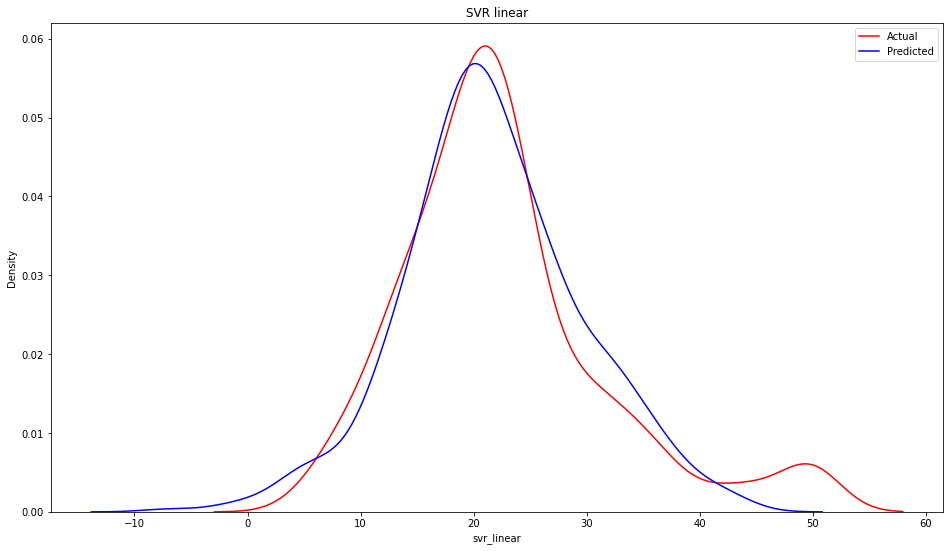

In [66]:
plotting(Y,data["svr_linear"],"SVR linear")

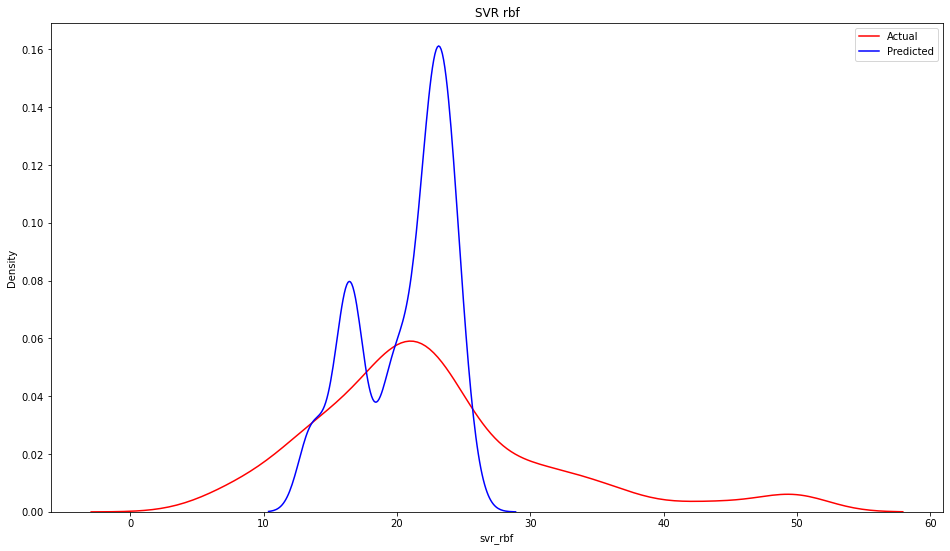

In [67]:
plotting(Y,data["svr_rbf"],"SVR rbf")

In [68]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,predict medv,poly_reg,svr_linear,svr_rbf
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.588436,24.013315,28.698657,23.003907
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.334068,23.322219,23.826753,23.444981
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.338403,32.347244,30.228526,23.728731
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,28.204330,32.272590,28.935986,24.312963
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,27.385086,31.693884,28.730285,24.190807


### SVR mean squared error

In [69]:
svr_linear_error = mean_squared_error(y_test,svr_linear.predict(x_test))
svr_linear_error

12.985998652970192

In [70]:
svr_rbf_error = mean_squared_error(Y,data["svr_rbf"])
svr_rbf_error

66.75476655678574

# Regression forest 

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
forest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=1000) 


## Regression forest errors

In [73]:
forest_cv = cross_val_score(forest,X,Y, cv = cv2)

In [74]:
forest_cv,forest_cv.mean()

(array([0.93021102, 0.89539126, 0.79657305, 0.91412013, 0.69436206,
        0.92065308, 0.86754513, 0.85547738, 0.89721027, 0.90701595]),
 0.8678559331996194)

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [76]:
forest.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=2, oob_score=True)

In [77]:
forest.score(x_test,y_test)

0.8395290154622814

In [78]:
data["Random forest prediction"] = forest.predict(X)

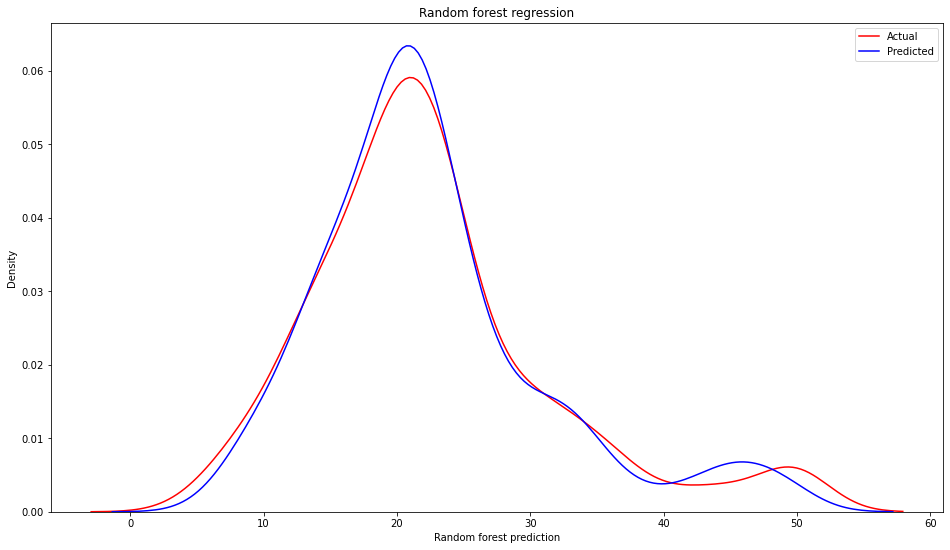

In [79]:
plotting(Y,data["Random forest prediction"],"Random forest regression")

## Mean squared error Random Forest


In [80]:
forest_MSE = mean_squared_error(Y,data["Random forest prediction"])

In [81]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,predict medv,poly_reg,svr_linear,svr_rbf,Random forest prediction
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.588436,24.013315,28.698657,23.003907,25.6209
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.334068,23.322219,23.826753,23.444981,21.9614
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.338403,32.347244,30.228526,23.728731,34.4983
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,28.204330,32.272590,28.935986,24.312963,33.5563
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,27.385086,31.693884,28.730285,24.190807,35.2231


## Conclusion

In [82]:
d = {'model': ["Linear", "Polynomial","SVR_linear","SVR_rbf","RandomForest"], 
     'mean_score': [cv_linear.mean(),cv_poly.mean(),cv_svr_linear.mean(),cv_svr_rbf.mean() ,forest_cv.mean()],
     'mean_squared_error': [mean_squared_linear,poly_mean_squared_error, svr_linear_error,svr_rbf_error,forest_MSE] 
    }

In [83]:
conclusion = pd.DataFrame(d)

In [84]:
conclusion

,model,mean_score,mean_squared_error
0,Linear,0.705990,16.492018
1,Polynomial,0.760683,8.164894
2,SVR_linear,0.684995,12.985999
3,SVR_rbf,0.214891,66.754767
4,RandomForest,0.867856,4.327388


### As you can see the best models for this dataframe are polynomial regression (degree= 2) and the Random forest Regression with a high R_squared and with low mean_squared_error